In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [425]:
meth = pd.read_csv('math.xls')

In [426]:
meth.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [427]:
#Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
#1. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
#2. Оцените количество уникальных значений для номинативных переменных.
#3. По необходимости преобразуйте данные
#4. Проведите корреляционный анализ количественных переменных
#5. Отберите не коррелирующие переменные.
#6. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
## 7. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [428]:
#1. Посмотрите на распределение признака для числовых переменных, устраните выбросы.

In [429]:
meth.sex

0      F
1      F
2      F
3      F
4      F
      ..
390    M
391    M
392    M
393    M
394    M
Name: sex, Length: 395, dtype: object

In [430]:
meth.info()
print(meth.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [431]:
## Присваиваем полу числовое значение
meth['sex'].replace({'F':0, 'M':1},inplace=True)


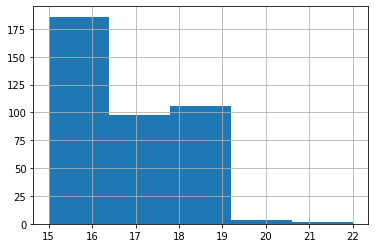

In [432]:
meth.age.hist(bins=5)

In [433]:
#Убираем выбросы по возрасту
meth = meth[meth.age<20]

In [434]:
##2. Оцените количество уникальных значений для номинативных переменных.

In [435]:
meth.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,0,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,0,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,0,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,0,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,0,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [436]:
meth_quant = meth.drop(columns=['school','address', 'famsize','Pstatus','Mjob','Fjob', 'reason'])

In [437]:
meth.loc[:,meth.dtypes == object]

,school,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,U,GT3,NaN,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,U,LE3,T,at_home,other,other,mother,yes,no,NaN,no,yes,yes,yes,NaN
3,GP,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,U,LE3,T,teacher,services,course,mother,no,yes,yes,no,yes,yes,yes,no
389,MS,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,NaN,no
391,MS,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
393,MS,R,LE3,T,services,other,course,mother,no,no,no,NaN,no,yes,yes,no


In [438]:
#find object columns
obj = meth.loc[:,meth.dtypes == object]
# drop columns that can be converted
obj = obj.drop(columns=['schoolsup','famsup','romantic','internet','higher','guardian', 'paid','activities','nursery'])

In [439]:
obj

,school,address,famsize,Pstatus,Mjob,Fjob,reason
0,GP,U,NaN,A,at_home,teacher,course
1,GP,U,GT3,NaN,at_home,other,course
2,GP,U,LE3,T,at_home,other,other
3,GP,U,GT3,T,health,NaN,home
4,GP,U,GT3,T,other,other,home
...,...,...,...,...,...,...,...
388,MS,U,LE3,T,teacher,services,course
389,MS,U,GT3,T,other,other,course
391,MS,U,LE3,T,services,services,course
393,MS,R,LE3,T,services,other,course


In [440]:
meth_quant['guardian'].replace({'mother':0, 'father':1},inplace=True)

In [441]:
meth_quant

,sex,age,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,18,4.0,4.0,0,2.0,2.0,0.0,yes,no,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,0,17,1.0,1.0,1,1.0,2.0,0.0,no,yes,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,0,15,1.0,1.0,0,1.0,2.0,3.0,yes,no,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,0,15,4.0,2.0,0,1.0,3.0,0.0,no,yes,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,0,16,3.0,3.0,1,1.0,2.0,0.0,no,yes,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0,18,3.0,1.0,0,1.0,2.0,0.0,no,yes,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
389,0,18,1.0,1.0,0,NaN,2.0,1.0,no,no,...,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,1,17,3.0,1.0,0,2.0,1.0,0.0,no,no,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
393,1,18,3.0,2.0,0,3.0,1.0,0.0,no,no,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [442]:
#3. По необходимости преобразуйте данные

In [443]:
meth_quant['schoolsup'].replace({'yes':1, 'no':0},inplace=True)
meth_quant['famsup'].replace({'yes':1, 'no':0},inplace=True)
meth_quant['higher'].replace({'yes':1, 'no':0},inplace=True)
meth_quant['internet'].replace({'yes':1, 'no':0},inplace=True)
meth_quant['romantic'].replace({'yes':1, 'no':0},inplace=True)
meth_quant['nursery'].replace({'yes':1, 'no':0},inplace=True)
meth_quant['paid'].replace({'yes':1, 'no':0},inplace=True)
meth_quant['activities'].replace({'yes':1, 'no':0},inplace=True)
meth_quant['traveltime'].fillna(value=meth['traveltime'].mean(), inplace=True)
meth_quant['studytime'].fillna(value=meth['studytime'].mean(), inplace=True)
meth_quant['guardian'].replace({'mother':0, 'father':1},inplace=True)

In [444]:
meth_quant.corr().score

sex                    0.102906
age                   -0.171707
Medu                   0.208525
Fedu                   0.078448
traveltime            -0.069611
studytime              0.114667
failures              -0.355198
schoolsup             -0.087378
famsup                -0.007752
paid                   0.099952
activities             0.004888
nursery                0.050586
studytime, granular   -0.115586
higher                 0.183738
internet               0.069825
romantic              -0.143923
famrel                 0.054678
freetime               0.015520
goout                 -0.127550
health                -0.078156
absences               0.083520
score                  1.000000
Name: score, dtype: float64

In [445]:
#выкинем все что плохо влияет на score (corr < 0.1)

In [446]:
#5. Отберите не коррелирующие переменные.

In [447]:
meth_quant.drop(columns= ['absences','health','famrel','internet','activities','famsup','freetime','nursery','Fedu','traveltime','schoolsup','famsup'], inplace=True)

In [448]:
#4. Проведите корреляционный анализ количественных переменных

In [449]:
meth_quant.corr().score

sex                    0.102906
age                   -0.171707
Medu                   0.208525
studytime              0.114667
failures              -0.355198
paid                   0.099952
studytime, granular   -0.115586
higher                 0.183738
romantic              -0.143923
goout                 -0.127550
score                  1.000000
Name: score, dtype: float64

In [450]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=meth_quant,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

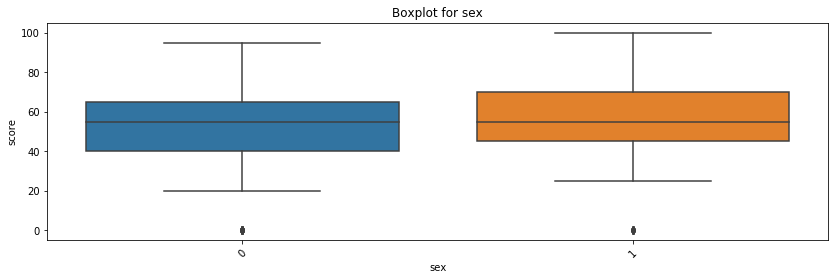

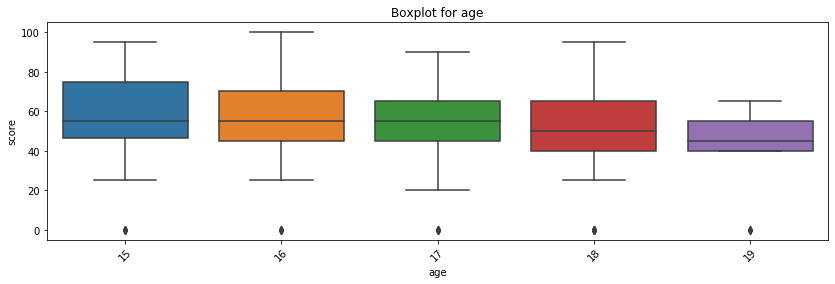

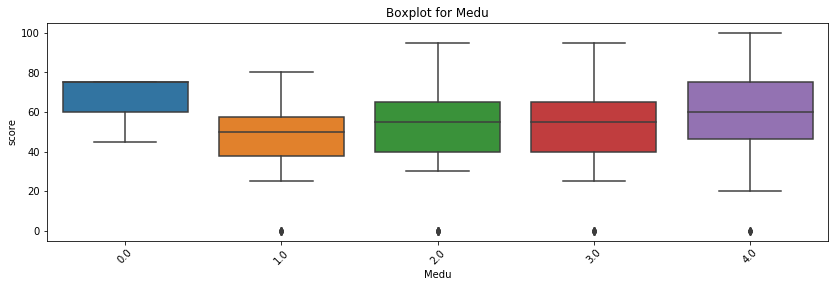

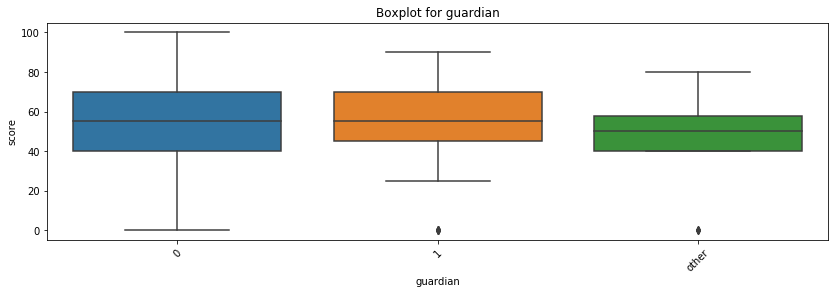

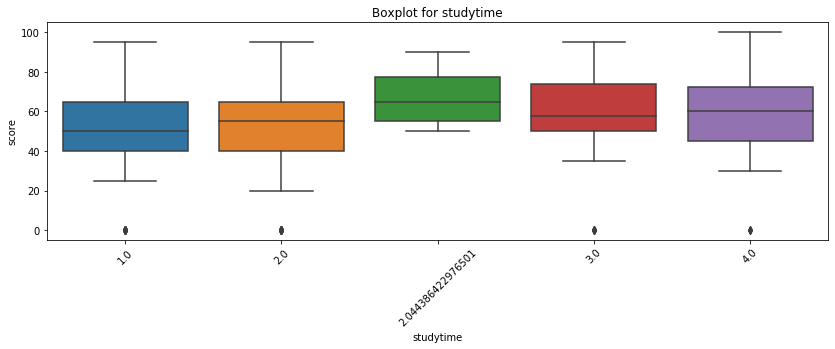

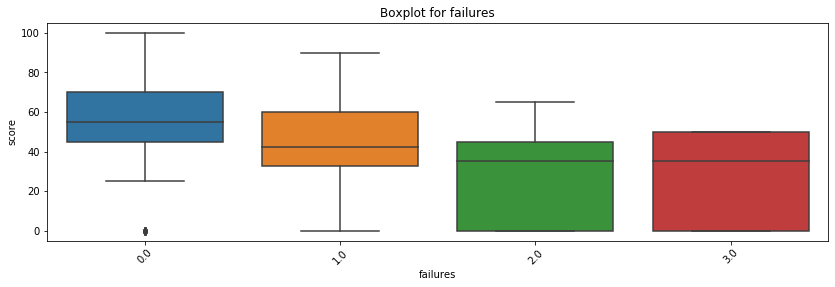

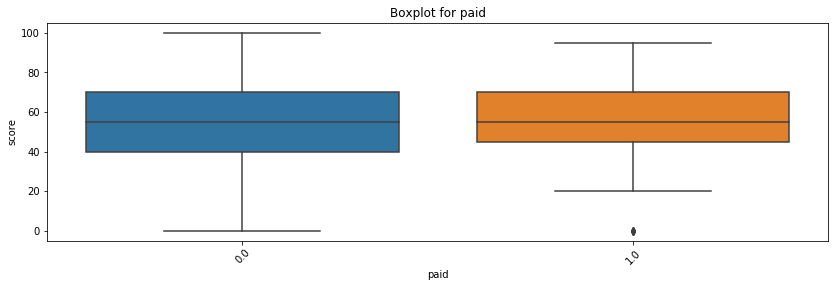

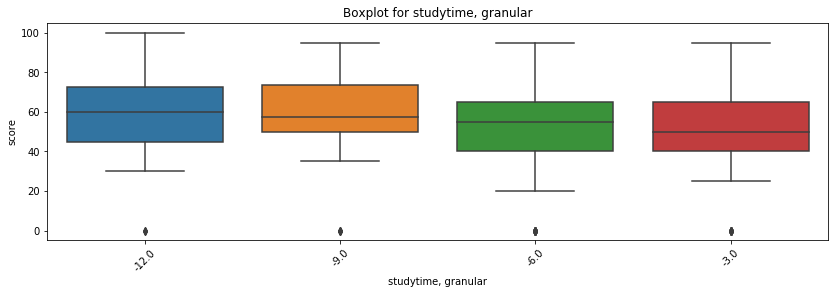

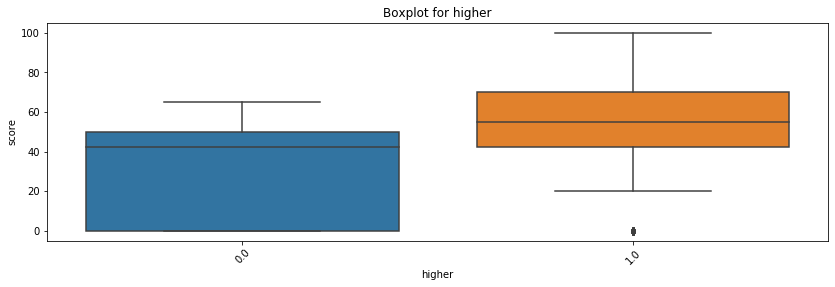

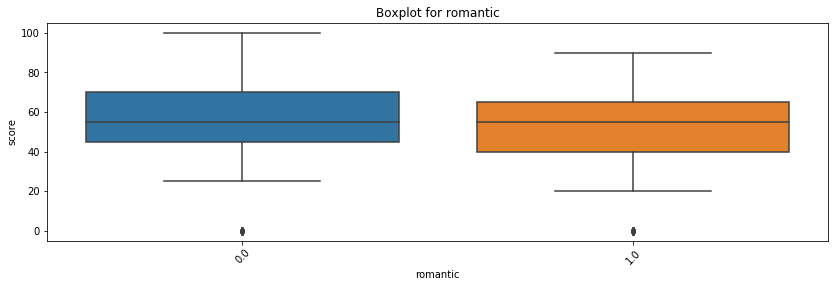

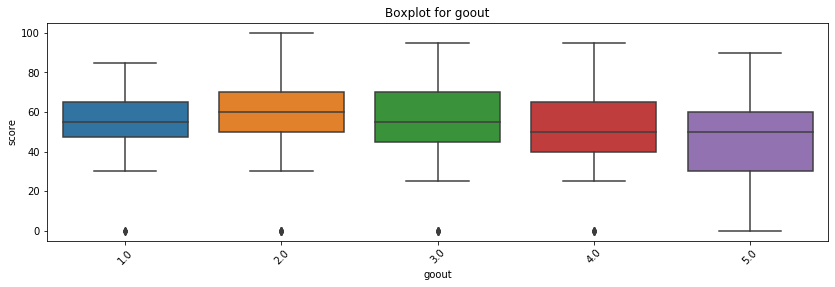

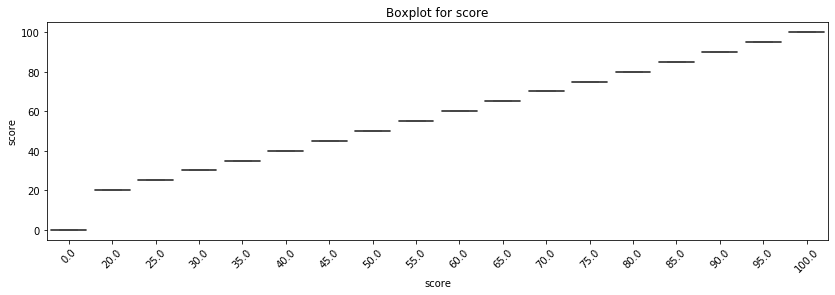

In [451]:
for col in meth_quant.columns:
    get_boxplot(col)

In [452]:
#6. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).

In [453]:
# Колонки paid and Medu странно коррелируют с оценкой, избавимся от них
meth_quant.drop(columns=['Medu', 'paid'], inplace=True)

## 7. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели
Хочу подметить что большое количество данных отсутствует, просто избавляясь от строк без одного данного избавит нас от 80% информации, все что можно было более-менее преобразовать и заполнить дало мало новой информации. Данные очень сырые и будут весьма незначительными для построения хорошей модели